# Spam Detection using Naive Baye's Algorithm and NLP

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

Original Data Source: https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [2]:
df = pd.read_table('SMSSpamCollection',
                   sep='\t', 
                   header=None,
                   names=['label', 'message'])


df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Checking info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Preprocessing

### Marking not spam as 0 and spam as 1

In [4]:
df.label = df.label.map({"ham":0, "spam":1})

df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Converting to lower case

In [5]:
df['message'] = df.message.map(lambda x: x.lower())
df.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


### Removing all the special characters from data

In [6]:
df['message'] = df.message.str.replace('[^\w\s]', '')

df['message']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ü b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: message, Length: 5572, dtype: object

## NLP processing

In [7]:
import nltk

In [8]:
## nltk.download()

### Tokenizing the text

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
df['message'] = df['message'].apply(nltk.word_tokenize)

df['message']

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, dont, think, he, goes, to, usf, he, l...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568         [will, ü, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, soany, other,...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: message, Length: 5572, dtype: object

### Stemming

In [11]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
 
df['message'] = df['message'].apply(lambda x: [stemmer.stem(i) for i in x])

df['message']

0       [go, until, jurong, point, crazi, avail, onli,...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, in, 2, a, wkli, comp, to, win, f...
3       [u, dun, say, so, earli, hor, u, c, alreadi, t...
4       [nah, i, dont, think, he, goe, to, usf, he, li...
                              ...                        
5567    [thi, is, the, 2nd, time, we, have, tri, 2, co...
5568             [will, ü, b, go, to, esplanad, fr, home]
5569    [piti, wa, in, mood, for, that, soani, other, ...
5570    [the, guy, did, some, bitch, but, i, act, like...
5571                       [rofl, it, true, to, it, name]
Name: message, Length: 5572, dtype: object

### Checking counts

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# This converts the list of words into space-separated strings
df['message'] = df['message'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()
counts = count_vect.fit_transform(df['message'])


In [13]:
from sklearn.feature_extraction.text import TfidfTransformer


#Tfidf  -- TERM FREQUENCY  -- INVERSE DOCUMENNT FREQUNCY

transformer = TfidfTransformer().fit(counts)

counts = transformer.transform(counts)

counts

<5572x8169 sparse matrix of type '<class 'numpy.float64'>'
	with 72500 stored elements in Compressed Sparse Row format>

## Model Building

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, 
                                                    df['label'], 
                                                    random_state=100,
                                                    test_size=0.1)

### Multinomial NB

In [15]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

model = MultinomialNB()

model.fit(X_train, y_train)

model.score(X_train, y_train)

0.9654966094934184

In [16]:
predicted = model.predict(X_test)

In [17]:
## Checking accuracy reports

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

print('Accuracy_score Testing Data: ',round(accuracy_score(y_test, predicted)*100,2))

print('\n','Classification_report Testing data: ','\n','\n',classification_report(y_test, predicted))

cm = confusion_matrix(y_test, predicted)
cm

Accuracy_score Testing Data:  94.62

 Classification_report Testing data:  
 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       476
           1       1.00      0.63      0.78        82

    accuracy                           0.95       558
   macro avg       0.97      0.82      0.87       558
weighted avg       0.95      0.95      0.94       558



array([[476,   0],
       [ 30,  52]], dtype=int64)

### Neither underfit nor overfit

### Bernoulli NB

In [18]:
model2 = BernoulliNB()

model2.fit(X_train, y_train)

model2.score(X_train, y_train)

0.9856402074192262

In [19]:
y_pred = model2.predict(X_test)

In [20]:
## Checking accuracy reports

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

print('Accuracy_score Testing Data: ',round(accuracy_score(y_test, y_pred)*100,2))

print('\n','Classification_report Testing data: ','\n','\n',classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm

Accuracy_score Testing Data:  98.39

 Classification_report Testing data:  
 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       476
           1       0.99      0.90      0.94        82

    accuracy                           0.98       558
   macro avg       0.99      0.95      0.97       558
weighted avg       0.98      0.98      0.98       558



array([[475,   1],
       [  8,  74]], dtype=int64)

### Although Bernoulli is giving good results but it should not be used in this case

## ROC-AUC Curve

In [21]:
from sklearn import metrics

print("Accuracy:",metrics.roc_curve(y_test, predicted))

print("Accuracy:",metrics.roc_curve(y_test, y_pred))

Accuracy: (array([0., 0., 1.]), array([0.        , 0.63414634, 1.        ]), array([2, 1, 0], dtype=int64))
Accuracy: (array([0.        , 0.00210084, 1.        ]), array([0.        , 0.90243902, 1.        ]), array([2, 1, 0], dtype=int64))


In [22]:
## Plot of ROC

fpr = [0., 0., 1.]

tpr = [0.        , 0.63414634, 1.        ]

fpr2 = [0.        , 0.00210084, 1.        ]

tpr2 = [0.        , 0.90243902, 1.        ]

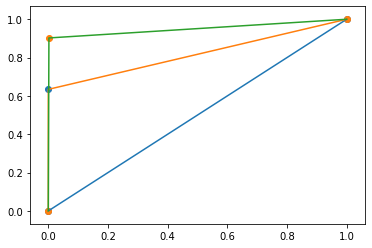

In [23]:
plt.plot([0,1],[0,1])  #guess line

plt.scatter(fpr,tpr)
plt.plot(fpr,tpr)

plt.scatter(fpr2,tpr2)
plt.plot(fpr2,tpr2)

plt.show()

### It shows that model 2 is much better as it has more area under the curve